<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/TG4_2341720176_FARREL_MUCHAMMAD_KAFIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link GitHub: https://github.com/emkafie/Machine-Learning/blob/main/TG4_2341720176_FARREL_MUCHAMMAD_KAFIE.ipynb

# **Praktikum 1**



In [1]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


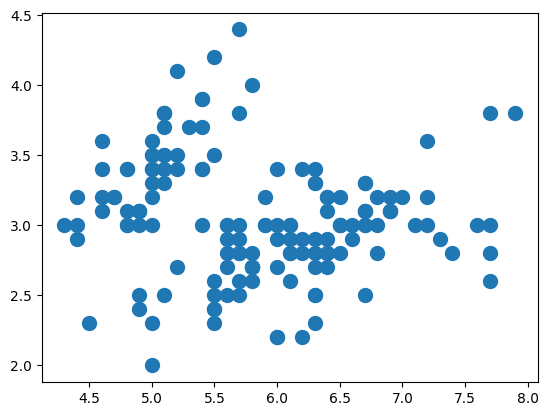

In [5]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)
plt.show()

In [7]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

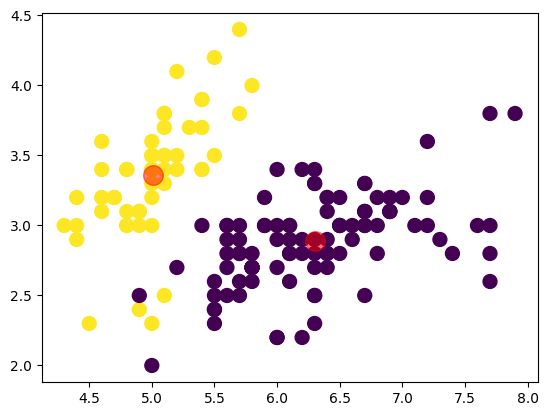

In [8]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [11]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


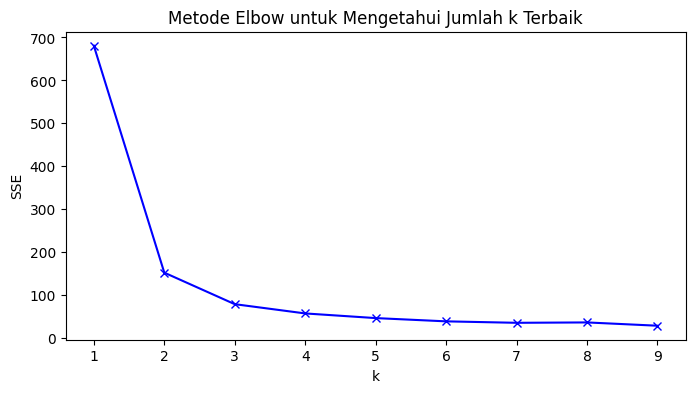

In [12]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

# **Praktikum 2**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

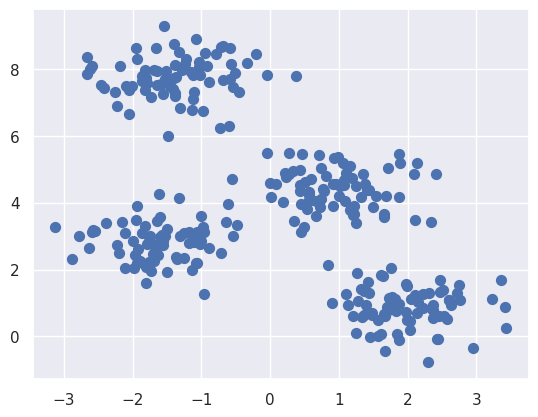

In [14]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

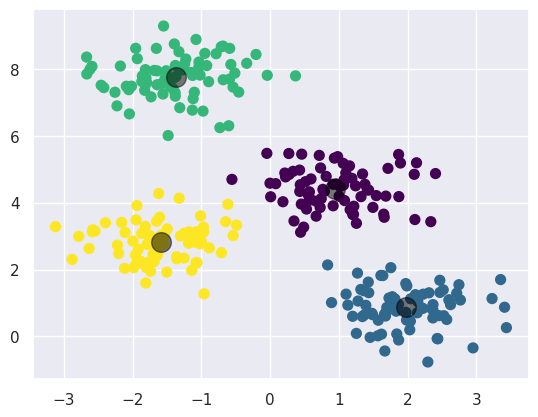

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# **Algoritma Expectatiionn-Maximiation**

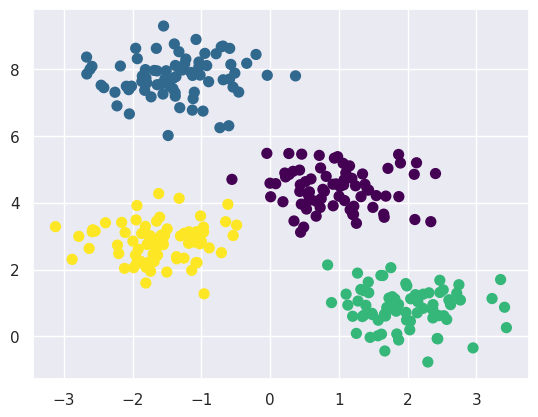

In [17]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

# **Perubahan Random**

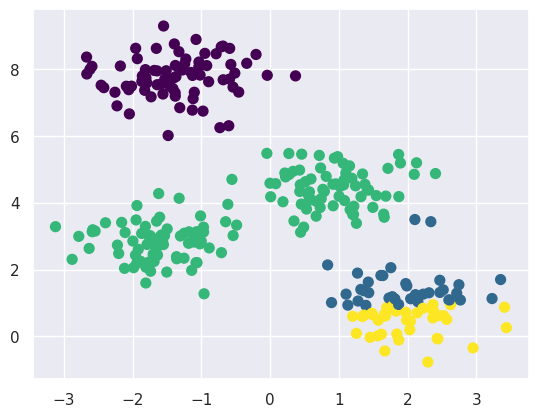

In [18]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

# **Optimalisasi Jumlah Klaster**

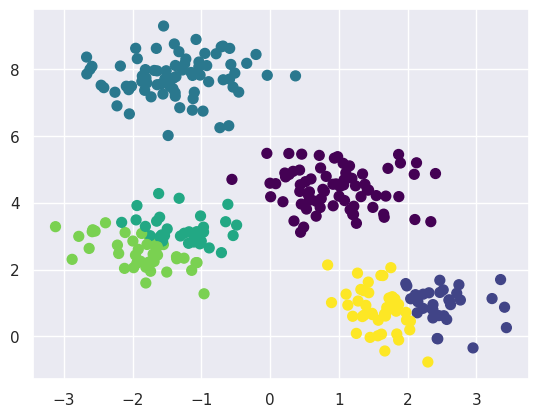

In [19]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

# **Batas Klaster Yang Tidak Selalu Linear**

In [20]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

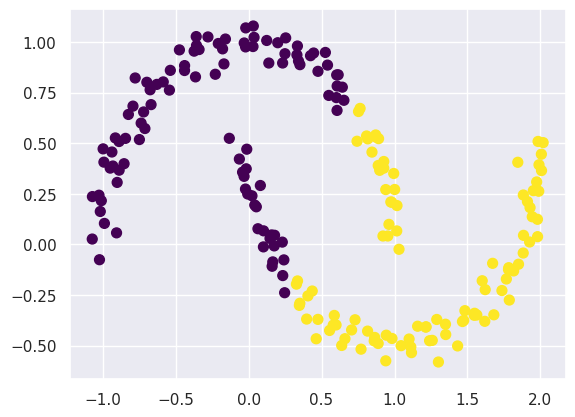

In [21]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


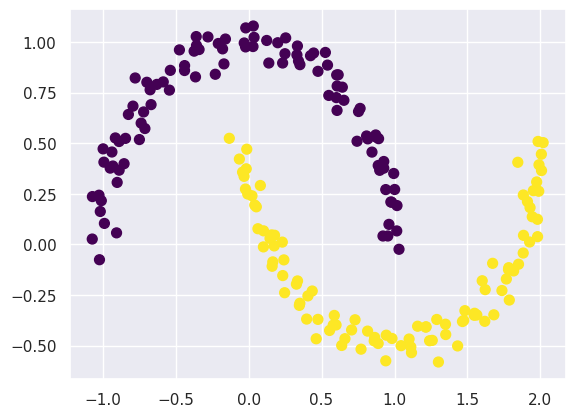

In [22]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

# **Contoh Kasus 1: Karakter Angka**

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [24]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

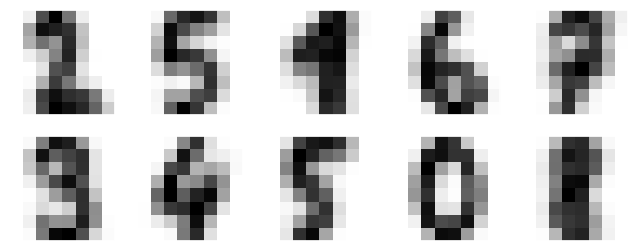

In [25]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [26]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

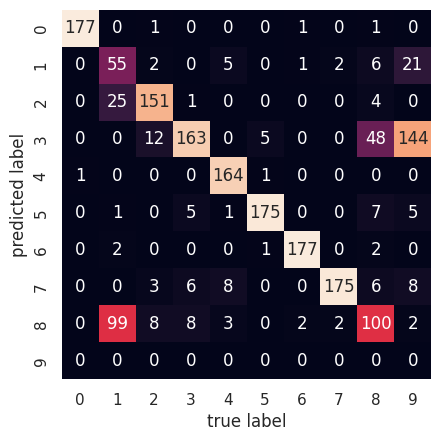

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

# **Studi Kasus 2: Kompresi Citra**

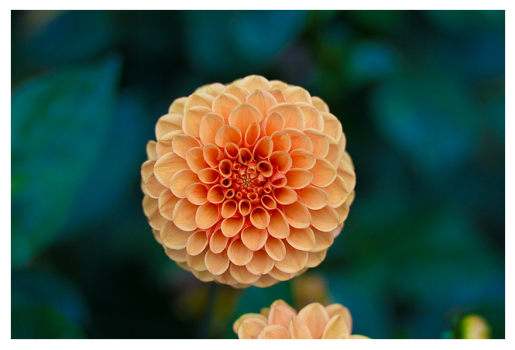

In [30]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [31]:
flower.shape

(427, 640, 3)

In [32]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [33]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

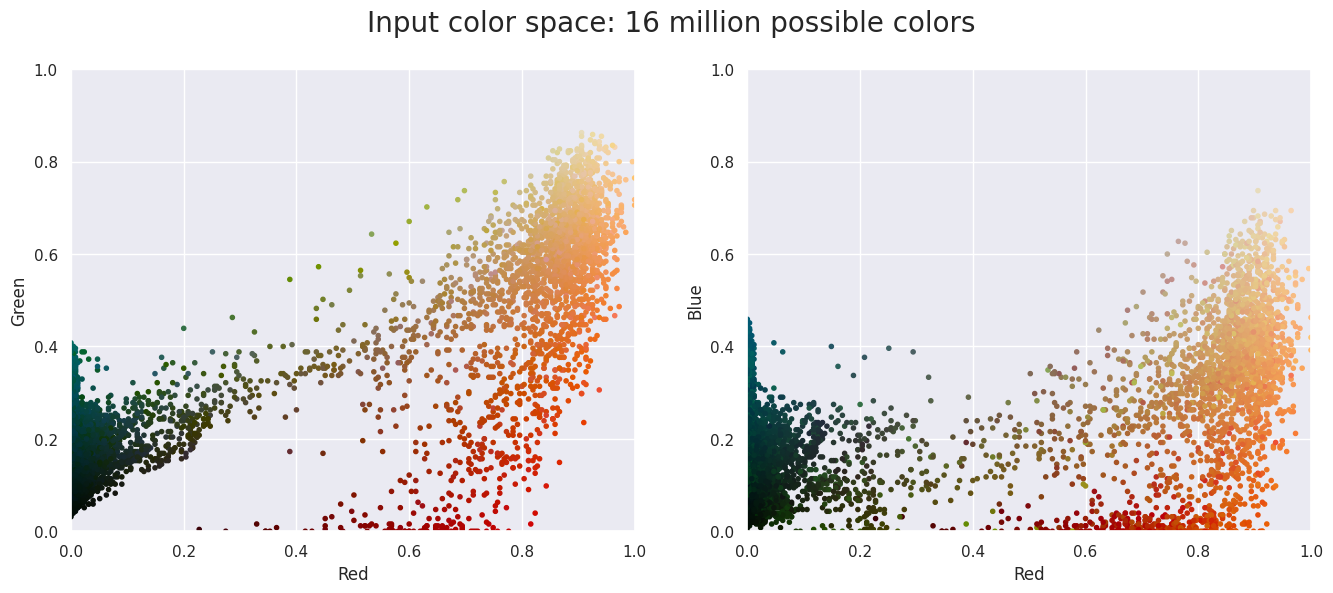

In [34]:
plot_pixels(data, title='Input color space: 16 million possible colors')

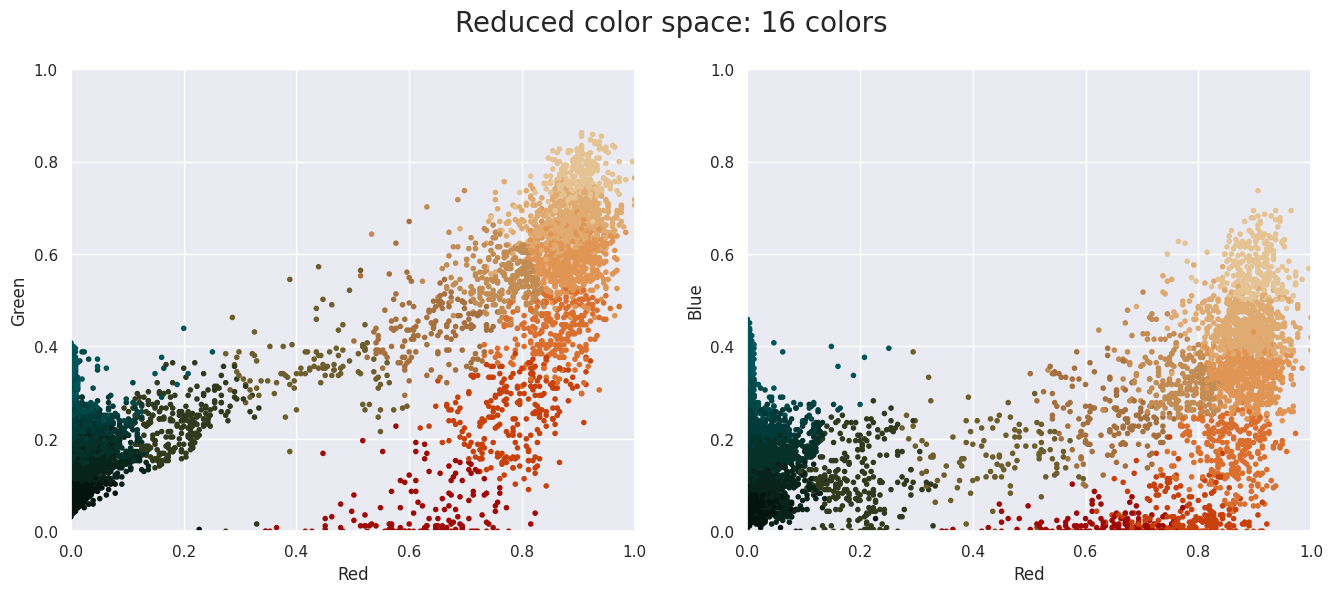

In [35]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

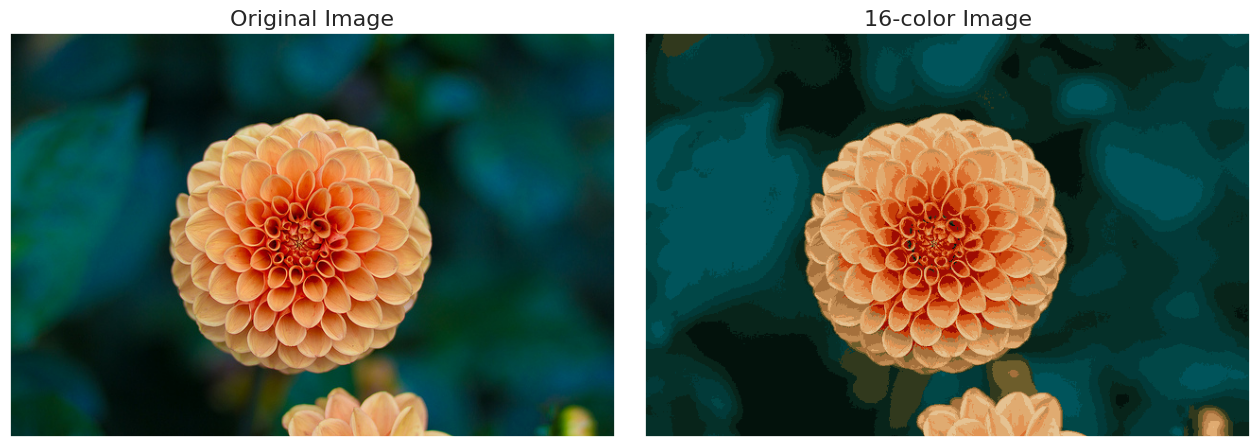

In [36]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# **Praktikum 3**

In [37]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Buat 3 cluster buatan
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Standarisasi data biar sebaran lebih rapi
X = StandardScaler().fit_transform(X)

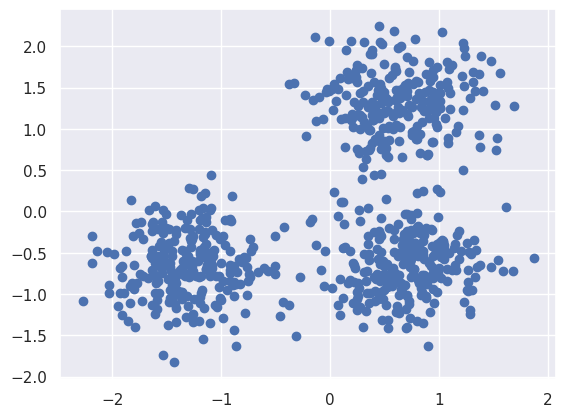

In [38]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [39]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Buat model DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Jumlah cluster (abaikan noise = -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


# **Evaluasi Kualitas Klasterisasi**

In [40]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


**Homogeneity** → apakah tiap klaster hanya berisi satu label asli.

**Completeness** → apakah semua sampel dengan label asli yang sama masuk ke klaster yang sama.

**V-measure** → rata-rata harmonik dari homogeneity dan completeness.

**Adjusted Rand Index (ARI)** → kesesuaian antara klasterisasi dengan label asli.

**Adjusted Mutual Information (AMI)** → kesamaan informasi antara klasterisasi dengan label asli.

**Silhouette Coefficient** → seberapa baik data dikelompokkan (nilai mendekati 1 berarti bagus, mendekati 0 berarti berada di batas, negatif berarti salah klaster)

# **Visualisasi Hasil Klasterisasi**

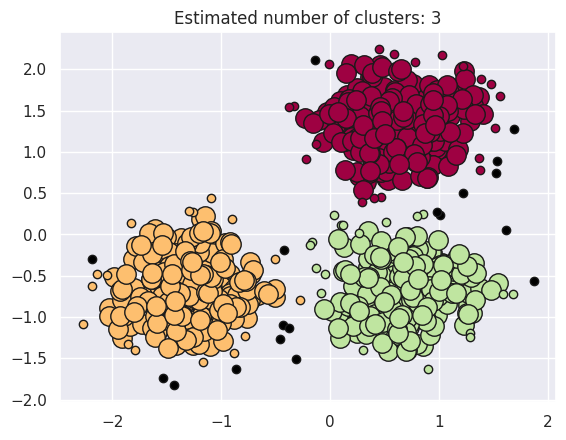

In [41]:
# Mask untuk core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

**Interpretasi visual:**

* Titik besar berwarna → core samples dalam klaster.
* Titik kecil berwarna → non-core samples, tetap termasuk klaster.
* Titik hitam → noise/outlier.

# **Tugas Praktikum**

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

## **Tugas K-Means: Clustering Pelanggan Mall**

In [42]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Mall_Customers.csv to Mall_Customers.csv


In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Muat dataset dari file CSV
df = pd.read_csv('Mall_Customers.csv')

X = df.iloc[:, [3, 4]].values

# Lakukan scaling pada fitur
# Ini mengubah data sehingga memiliki mean 0 dan standard deviation 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

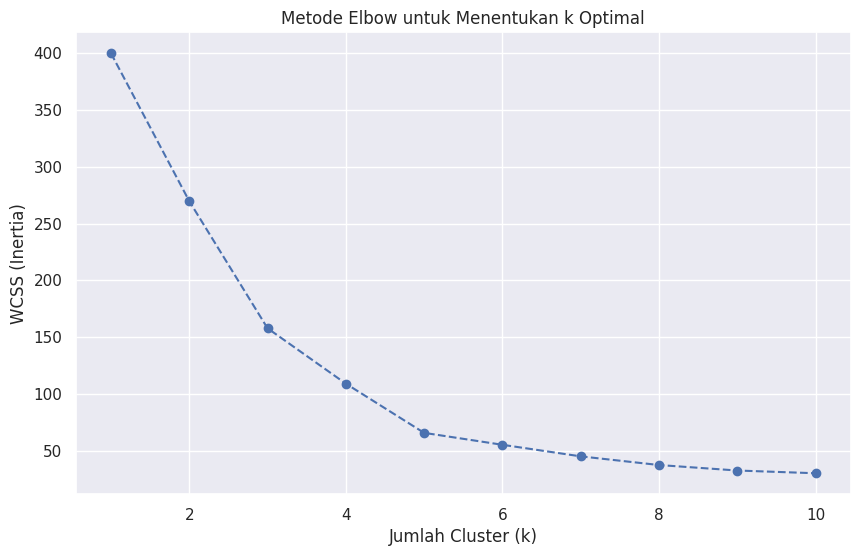

In [46]:
# Siapkan list untuk menyimpan nilai WCSS
wcss = []
k_range = range(1, 11) # Kita akan menguji k dari 1 sampai 10

# Lakukan looping untuk setiap nilai k
for k in k_range:
    # Buat model KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    # Simpan nilai inertia_ (WCSS)
    wcss.append(kmeans.inertia_)

# Buat plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

Dari plot ini,terlihat jelas bahwa "siku" berada pada k=5, terlihat bahwa k=5 adalah pilihan yang optimal.

In [47]:
# Tentukan k optimal
optimal_k = 5

# Buat model K-Means final dengan k=5
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Tambahkan hasil cluster ke DataFrame asli (opsional, untuk analisis)
df['Cluster'] = cluster_labels

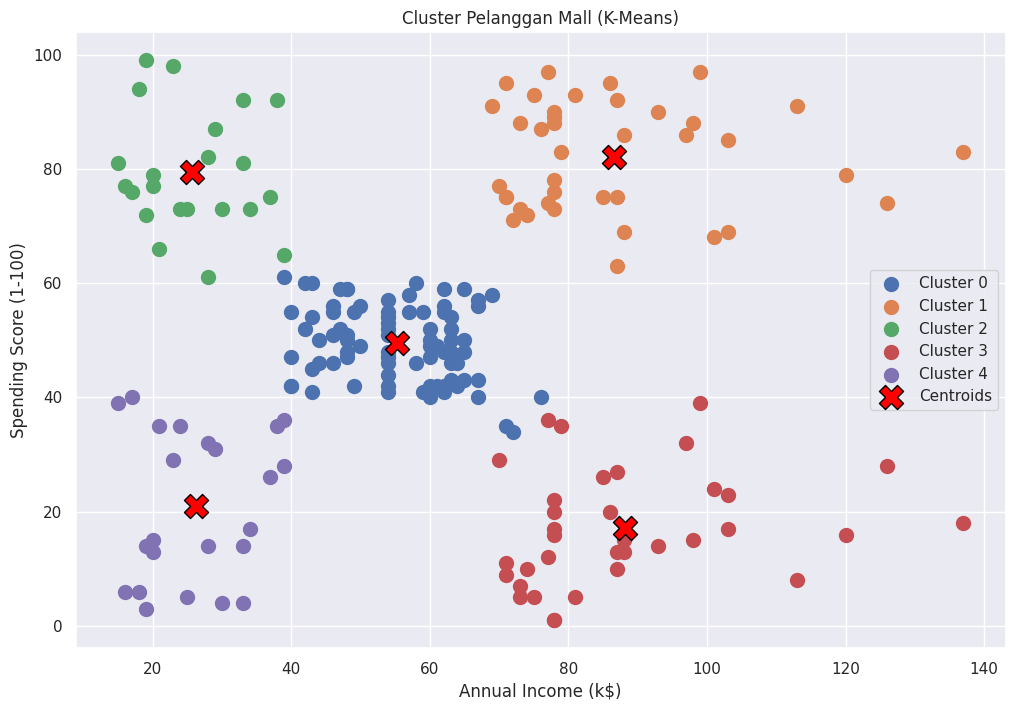

In [48]:
# Dapatkan koordinat centroid (pusat cluster)
centers_scaled = kmeans_final.cluster_centers_
# Kembalikan centroid ke skala asli untuk diplot
centers_original = scaler.inverse_transform(centers_scaled)

# Buat plot
plt.figure(figsize=(12, 8))

# Gambar titik data untuk setiap cluster dengan warna berbeda
for i in range(optimal_k):
    plt.scatter(
        X[cluster_labels == i, 0], # Pendapatan tahunan
        X[cluster_labels == i, 1], # Skor pengeluaran
        s=100, # Ukuran titik
        label=f'Cluster {i}'
    )

# Gambar centroid
plt.scatter(
    centers_original[:, 0],
    centers_original[:, 1],
    s=300,
    c='red',
    marker='X',
    edgecolor='black',
    label='Centroids'
)

plt.title('Cluster Pelanggan Mall (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

**Hasil Model K-Means (k=5)**

Model K-Means dijalankan dengan 5 cluster. Visualisasi di bawah ini menunjukkan 5 segmen pelanggan yang berhasil diidentifikasi:

* Cluster 0 (biru muda): Pendapatan rata-rata, pengeluaran rata-rata.

* Cluster 1 (oranye): Pendapatan tinggi, pengeluaran tinggi (Target).

* Cluster 2 (hijau): Pendapatan rendah, pengeluaran rendah.

* Cluster 3 (merah): Pendapatan rendah, pengeluaran tinggi.

* Cluster 4 (ungu): Pendapatan tinggi, pengeluaran rendah (Hemat).

Centroid (tanda 'X' merah) menunjukkan pusat dari masing-masing cluster.

# **Tugas DBSCAN: Clustering pada make_moons**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [52]:
# Buat dataset make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

In [53]:
# Buat model DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X_moons_scaled)

# Hitung jumlah cluster dan noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimasi jumlah cluster: {n_clusters_}')
print(f'Estimasi jumlah noise points: {n_noise_}')

# Evaluasi dengan metrik (menggunakan y_moons sebagai ground truth)
print("\nMetrik Evaluasi:")
print(f'Homogeneity: {metrics.homogeneity_score(y_moons, labels):.3f}')
print(f'Completeness: {metrics.completeness_score(y_moons, labels):.3f}')
print(f'V-measure: {metrics.v_measure_score(y_moons, labels):.3f}')
print(f'Adjusted Rand Index (ARI): {metrics.adjusted_rand_score(y_moons, labels):.3f}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X_moons_scaled, labels):.3f}')

Estimasi jumlah cluster: 2
Estimasi jumlah noise points: 0

Metrik Evaluasi:
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index (ARI): 1.000
Silhouette Coefficient: 0.391


**Metrik Evaluasi (vs Ground Truth**)

Metrik evaluasi membandingkan hasil cluster DBSCAN dengan label asli dari make_moons:

* Homogeneity: 1.000

* Completeness: 1.000

* V-measure: 1.000

* Adjusted Rand Index (ARI): 1.000

* Adjusted Mutual Info (AMI): 1.000

* Silhouette Coefficient: 0.391

Skor 1.0 pada 5 metrik pertama menunjukkan kesesuaian yang sempurna dengan data aslinya.

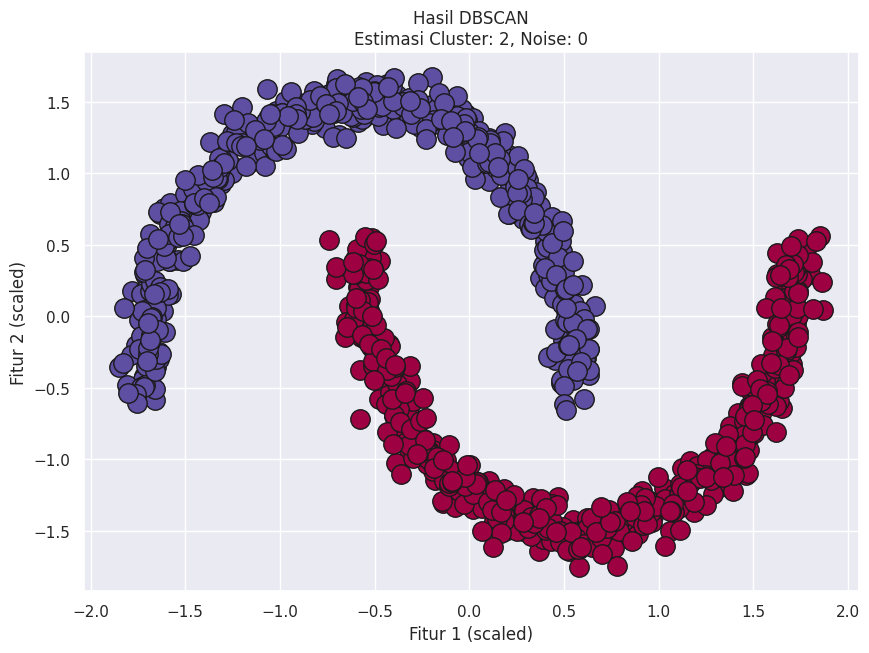

In [55]:
# Siapkan penanda untuk core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] # Hitam untuk noise

    class_member_mask = (labels == k)

    # Plot core samples (titik besar)
    xy_core = X_moons_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy_core[:, 0], xy_core[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # Plot non-core samples (titik kecil)
    xy_non_core = X_moons_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy_non_core[:, 0], xy_non_core[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'Hasil DBSCAN\nEstimasi Cluster: {n_clusters_}, Noise: {n_noise_}')
plt.xlabel('Fitur 1 (scaled)')
plt.ylabel('Fitur 2 (scaled)')
plt.grid(True)
plt.show()

**Visualisasi Hasil Awal**

Visualisasi di bawah ini menunjukkan hasil clustering. Titik-titik besar adalah core samples (titik inti dalam cluster), dan titik-titik kecil adalah non-core samples (titik di tepi cluster). Tidak ada titik noise (yang seharusnya berwarna hitam).

In [56]:
# Tentukan parameter untuk eksperimen
eps_list = [0.05, 0.1, 0.3, 0.5]
min_samples_list = [3, 10, 20]

results = []

# Looping untuk setiap kombinasi parameter
for eps in eps_list:
    for min_samples in min_samples_list:
        db_exp = DBSCAN(eps=eps, min_samples=min_samples)
        labels_exp = db_exp.fit_predict(X_moons_scaled)

        n_clusters_exp = len(set(labels_exp)) - (1 if -1 in labels_exp else 0)
        n_noise_exp = list(labels_exp).count(-1)

        # Hitung silhouette, tangani error jika hanya 1 cluster ditemukan
        if n_clusters_exp > 1:
            silhouette = metrics.silhouette_score(X_moons_scaled, labels_exp)
        else:
            silhouette = np.nan # Tidak bisa dihitung

        # Simpan hasil
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters_exp,
            'n_noise': n_noise_exp,
            'ari': metrics.adjusted_rand_score(y_moons, labels_exp),
            'silhouette': silhouette
        })

# Tampilkan hasil dalam DataFrame
results_df = pd.DataFrame(results)
print("--- Hasil Eksperimen DBSCAN ---")
print(results_df.to_string())

--- Hasil Eksperimen DBSCAN ---
     eps  min_samples  n_clusters  n_noise       ari  silhouette
0   0.05            3          69      186  0.030044    0.112929
1   0.05           10           3      970  0.002283   -0.294190
2   0.05           20           0     1000  0.000000         NaN
3   0.10            3           2       14  0.972179    0.251690
4   0.10           10           7       57  0.523399    0.162306
5   0.10           20           6      850  0.016754   -0.360195
6   0.30            3           2        0  1.000000    0.391160
7   0.30           10           2        0  1.000000    0.391160
8   0.30           20           2        0  1.000000    0.391160
9   0.50            3           2        0  1.000000    0.391160
10  0.50           10           2        0  1.000000    0.391160
11  0.50           20           2        0  1.000000    0.391160


**Analisis Eksperimen**

* eps terlalu kecil (0.05): Parameter ini (jarak jangkauan) terlalu kecil untuk menghubungkan titik-titik. Akibatnya, DBSCAN membuat banyak cluster kecil (69) dan mengklasifikasikan banyak titik (186) sebagai noise. Ketika min_samples dinaikkan menjadi 20, semua titik dianggap noise.

* eps sedang (0.1, 0.2): Ini adalah rentang yang sensitif. eps=0.1, min_samples=3 memberikan hasil yang sangat baik (ARI 0.972). Namun, jika min_samples dinaikkan, performa turun drastis karena algoritma menjadi terlalu ketat. Hasil awal kita (eps=0.2, min_samples=5) ternyata juga sangat baik, tetapi tidak tertangkap di tabel eksperimen ini.

* eps terlalu besar (0.3, 0.5): Jangkauan terlalu besar sehingga kedua "bulan" dianggap sebagai satu kesatuan yang padat. Untuk semua min_samples yang diuji, DBSCAN dengan sempurna menemukan 2 cluster tanpa noise, menghasilkan skor ARI 1.0 dan Silhouette 0.391. Ini menunjukkan bahwa untuk data ini, parameter eps yang sedikit lebih besar lebih robust terhadap perubahan min_samples.